# Coding Exercise #5 *Cavity Stability sims using ABCD Matrices* Solutions

In the lectures we derived the cavity stability condition

$0\le g_1 g_2 \le 1$

where $g_1 = 1 - d/r_1$, $g_2 = 1 - d/r_2$, with $d$ the cavity length, and $r_1$, $r_2$ the ROCs of the cavity mirrors.

In this coding exericse you will test the stability condition directly by simulating mutliple round trips of ray in the cavity using ABCD transfer matrices.

### 5.1 Cavity Stability Functions

**a)** Start by writing a function `g1_g2_product(d, r1, r2)` that returns the product $g_1 g_2$. 


In [1]:
def g1_g2_product(d,r1,r2):
    return (1-d/r1)*(1-d/r2)

**b)** Check your function for a 'half-symmetric confocal' cavity which has $r_1=2 d$ and $r_2 = $plane, which should have $g_1 g_2 = 1/2$.

Hint: $\infty$ can be represented by `np.inf`.

In [2]:
import numpy as np
#half symm confocal: 
d=2#m
r1=2*d
r2=np.inf
print(g1_g2_product(d,r1,r2))
#yes, prints 0.5

0.5


**c)** Next write a function `stability(d, r1, r2)` that returns the stability of a cavity as a string, "stable", "unstable", "marginally stable".

In [3]:
def stability(d,r1,r2):
    x=g1_g2_product(d,r1,r2)
    if x<0 or x>1:
        return "unstable"
    elif x==0 or x==1:
        return "marginally stable"
    else:
        return "stable"

### 5.2 Dictionary of cavities

**a)** Now create a dictionary to hold the parameters of number of cavities each with $d=1\,$m. I'll start the dictionary with a "plane-pane" cavity: 

In [4]:
cavities = {}
cavities["plane-plane"] = (1, np.inf, np.inf)
cavities["symmetric confocal"] =(1,1,1)
cavities["half-symmetric confocal"]=(1,2,np.inf)
cavities["concave-convex"]=(1,2,-1) #example values, need r1>d and r2=-(r1-d)
cavities["negative branch confocal"]=(1,1.5,0.5) #has r1+r2=2d
cavities["positive branch confocal"]=(1,0.5,-1.5) #r1-r2=2d

**b)** Add the following cavities to the dictionary:

- "symmetric-confocal"

- "half symmetric-confocal"

- "concave-convex" with $r_1=2 d$

- "negative-branch-confocal" with $r_1=1.5 d$

- "postive-branch-confocal" with $r_1 = 0.5 d$

**c)** Loop through the dictionary and print in a 'table' of the name of each cavity, its parameters, its $g_1*g_2$ product and its stability.
If you want to make the table look nice, read up python `f-string alignment`.

In [5]:
# printing Header
print(f"{'Cavity' : <30}{'g1*g2' : ^30}{'Stability' : >30}")
  
# printing values of variables in Aligned manner
for key in cavities:
    print(f"{key : <30}{g1_g2_product(cavities[key][0],cavities[key][1],cavities[key][2]) : ^30}{stability(cavities[key][0],cavities[key][1],cavities[key][2]) : >30}")

Cavity                                    g1*g2                                  Stability
plane-plane                                1.0                           marginally stable
symmetric confocal                         0.0                           marginally stable
half-symmetric confocal                    0.5                                      stable
concave-convex                             1.0                           marginally stable
negative branch confocal           -0.33333333333333337                           unstable
positive branch confocal           -1.6666666666666665                            unstable


### 5.3 ABCD Matrix Formalism - Rays

Let's start by reviewing the ABCD method for ray propagation in relation to analysing cavity stability.

Imagine an optical ray in the cavity, which is a distance $y$ above the optical axis and make an angle $\theta$ with it.

We can make a column vector of this $\begin{bmatrix} y \\ \theta \end{bmatrix}$.

The action of different optical elements on this ray can me modelled using various matrices. e.g. the matrix for free space
propagation through a distance $d$ is:


$\begin{bmatrix} 1 & d \\ 0 & 1 \end{bmatrix}$.

Multiplying this matrix into a ray vector leads to a new 
ray vector that has freely propagated a distance $d$.

$\begin{bmatrix} 1 & d \\ 0 & 1 \end{bmatrix} \begin{bmatrix} y \\ \theta \end{bmatrix} = \begin{bmatrix} y + d\theta \\ \theta \end{bmatrix}$.

Convince yourself that this is correct, note that theta must be in radians.


To model a round trip in a cavity, we also need matrices to represent the effect of the cavity mirrors.

This can be done for mirrors, but it's equivalent to treat the mirrors as lenses (i.e. we *unfold* the cavity) which makes life easier since we don't need to take into account the changes in direction upon each refletion.

The ABCD matrix for refraction in a thin lens of focal length f is:

$\begin{bmatrix} 1 & 0 \\ -1/f & 1 \end{bmatrix}$.

which doesn't change $y$ but changes $\theta$ in accordance with the laws of refraction. Again, convince yourself that this is correct.

The power of the ABCD matrix method is that the effect of multiple optical elements is obtained by multiplying the individual matrices to make one overall matrix.

We will use use `numpy` arrays to represent the matrices and vectors.

To multiply a matrix `M` into a vector `v` you write `M.dot(v)`.

To multiply matrices `M1` and `M2` you write `M1.dot(M2)`.

Remember, order is important - you have to think which ABCD matrix needs to get applied first and arrange the order in the product accordingly!

**a)** To get you started, the function `v_ray(y, theta)` and `M_d(d)` below, implement a ray vector and the ABCD matrix for free-space propagation, respectively, using  `numpy` arrays.

In [6]:
def v_ray(y, theta):
    """ ray vector"""
    return np.array([y, theta])

In [7]:
def M_d(d):
    """ free space propagation by distance d """
    return np.array([[1, d], 
                     [0, 1]])

**b)** Write a function `M_f(f)` that implements focusing by a thin lens of focal length $f$.

In [8]:
def M_f(f):
    """focusing by thin lens, focal length f"""
    return np.array([[1,0],
                     [-1/f,1]])

**c)** Now write a function `M_round_trip(d, r1, r2)` that implements a round-trip in a cavity of length `d` with mirrors of ROCs `r1`, `r2`. 

Remember we are "unwrapping" the cavity by modelling the mirrors as lenses, where $f_1 = r_1/2$, $f_2 = r_2/2$.

**Start your roundtrip at mirror 1 (lens 1)**. Although you are free to start the round-trip where you want in the cavity, this will make it easier to compare you solution with the example solution later.

In [9]:
def M_round_trip(d,r1,r2):
    f2=r2/2
    f1=r1/2
    #return M_d(d).dot(M_f(f2).dot(M_d(d).dot(M_f(f1))))
    return M_f(f1).dot(M_d(d).dot(M_f(f2).dot(M_d(d))))

**d)** Write a function `plotter(d, r1, r2, N, y0, theta0, cavity_name)` which plots with lines and markers
- y vs round trip number

- theta vs round trip number


where 
`N` is the number of round trips
`y0` is the initial ray position (recall that we set this up to start at mirror 1)
`theta0` is the initial ray angle
`cavity_name` is a string for adding a title to each of the plots


In [10]:
import matplotlib.pyplot as plt
def plotter(d,r1,r2,N,y0,theta0,cavity_name):
    y=[y0]
    theta=[theta0]
    #d,r1,r2=cavities[cavity_name]
    for i in range(N):
        ray=v_ray(y[-1],theta[-1])
        new_ray=M_round_trip(d,r1,r2).dot(ray)
        y.append(new_ray[0])
        theta.append(new_ray[1])
    plt.plot(range(N+1),np.array(y),label="y")
    plt.plot(range(N+1),np.array(theta),label="theta")
    plt.legend()
    plt.xlabel("Round trips")
    plt.title(cavity_name)
    plt.show()

**e)** Call `plotter` with the `plane plane` cavity parameters. Start with `N = 10`, `y0 = 0` and `theta0 = 1e-3`.

Interpret the behaviour (remember the cavity has been *unfolded*) and comment on the practicality of the plane plane cavity.

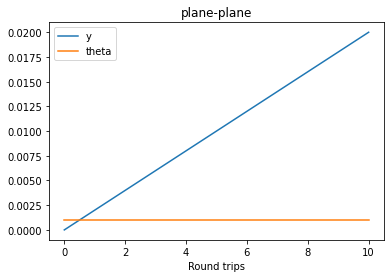

In [11]:
d,r1,r2=cavities["plane-plane"]
plotter(d,r1,r2,10,0,1e-3,"plane-plane")

**f)** Repeat for the `symmetric-confocal-cavity` and the `positive-branch-confocal`. For the latter, you might need to reduce the valuy of `N` to get a clearer picture of what is going on.

For these the interpretation of the plots will probably take some more thought. 

I found it helpful to sketch the unfolded cavity on a piece of paper over about 4 round trips to follow the ray through

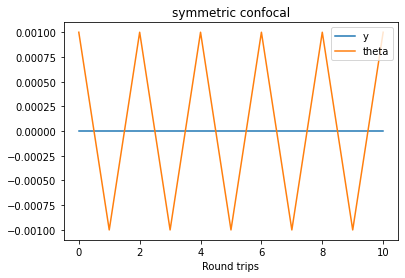

In [12]:
d,r1,r2=cavities["symmetric confocal"]
plotter(d,r1,r2,10,0,1e-3,"symmetric confocal")

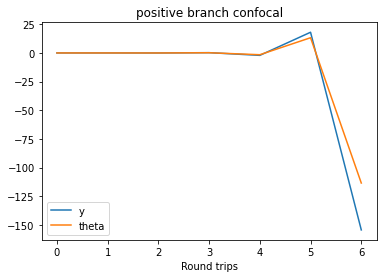

In [25]:
d,r1,r2=cavities["positive branch confocal"]
plotter(d,r1,r2,6,0,1e-3,"positive branch confocal")

### 5.4 Extension: ABCD Matrix Formalism - Gaussian Beams
In this extension, we will use the q-parameter to simulate a round trip of a Gaussian beam in a cavity.

**a)** Write the following functions:

i) `get_q(R, w, lam)` which returns the q-parameter for a Gaussian beam, where `R` is the wavefront ROC, `w` is the beam width, and `lam` is the wavelength.

In [14]:
def get_q(R,w,lam):
    return 1/((1/R)-(1J*lam/(np.pi*w**2)))

ii) `get_R_from_q(q, lam)` which returns `R` from `q`.

Make sure it can properly handle the case when the real part of q equals zero.


In [15]:
def get_R_from_q(q,w,lam):
    if q.real==0:
        return 1/((-1J/q.imag)+(1J*lam/(np.pi*w**2)))
    else:
        return 1/((1/q)+(1J*lam/(np.pi*w**2)))
print(get_R_from_q(1J,1e-3,800e-9))

(-0+1.3416478091411652j)


iii) `get_w_from_q(q, lam)` which returns `w` from `q`.


In [16]:
def get_w_from_q(q,R,lam):
    return np.sqrt(1J*lam/(((1/R)-(1/q))*np.pi))

iv) `get_new_q(M, q)` which returns the new q-parameter after application of ABCD matrix `M`.

In [17]:
def get_new_q(M,q):
    return (M[0][0]+M[0][1]/q)/(M[1][0]+M[1][1]/q)

**b)** Test the correctness of your functions by simulating the focusing of a Gaussian beam with a lens using the following parameters:

In [18]:
lam = 633e-9 # m
f = 1 # focal length of lens
w1 = 1e-3 # m, beam width at lens

i) Assuming the lens is positioned at the waist of the beam, get the q-parameter, `q1` of the beam at the lens.

You should get `4.963021569652121j`

In [19]:
q1=get_q(np.inf,w1,lam)
print(q1)
#yes, right value

(-0+4.963021569652121j)


ii) Check that the correct `R` and `w` are returned by `get_R_from_q(q1)` and `get_w_from_q(q1)`.

In [20]:
R=np.inf
#print(get_R_from_q(q1,w1,lam))
#get divide by zero, so infinite
print(get_w_from_q(q1,R,lam))

(0.0009999999999999998+0j)


iii) Now obtain the q-parameter, `qL`, for the Gaussian beam immediately after the lens. Hint: use `get_new_q` to apply the focusing ABCD matric `M_f(f)` from above to `q1`. 

You should get `(-0.9609856326054423+0.19362914690552147j)`.

In [21]:
qL=get_new_q(M_f(f),q1)
print(qL)
#yes, matches

(-0.9609856326054423+0.19362914690552147j)


iv) Now simulate the free-space propagation of the `qL` beam from the lens along the z axis given by

(-0.9609856326054423+0.19362914690552147j)


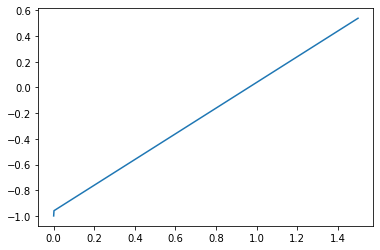

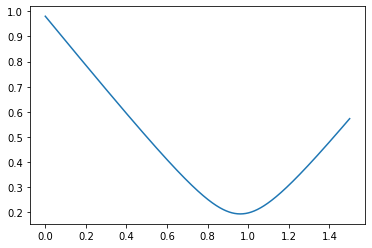

In [22]:
z = np.linspace(0, 1.5* f, 1000)
qL=get_new_q(M_f(1),q1)
print(qL)
Rs=[]
ws=[]
R=f
w=1e-3
for i in range(len(z)):
    if i==0:
        q=get_new_q(M_d(z[i]),qL)
        R=get_R_from_q(q,1e-3,lam)
        Rs.append(R.real)
        w=get_R_from_q(q,f,lam)
        ws.append(np.abs(w))
    else:
        q=get_new_q(M_d(z[i]-z[i-1]),q)
        R=get_R_from_q(q,w,lam)
        Rs.append(R.real)
        w=get_R_from_q(q,R,lam)
        ws.append(np.abs(w))
plt.plot(z,np.array(Rs))
plt.show()

plt.plot(z,np.array(np.abs(ws)))
plt.show()
    

Calculate `R` values and `w` values for the propagated beam sampled on `z` and plot them in two separate plots. Interpret your plots. Hint: use `M_d` from before. You should get plots tha look like these:
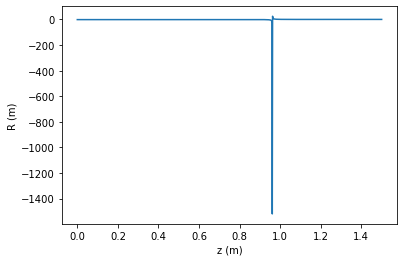
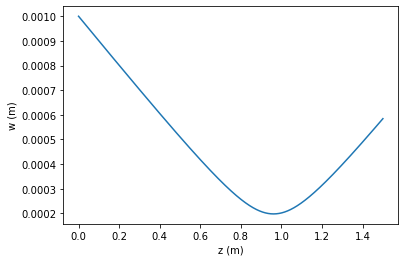


v) Find the z-value at the waist and compare to the formula from the notes 
### $f'=\frac{f}{1+(\frac{f}{z_{R,1}})^2}$,
where $z_{R,1}$ is the Rayleigh Range for the `q1` beam. 

In [23]:
def f_dash(f,zR):
    return f/(1+(f/zR)**2)
def zR(w0,lam):
    return np.pi*w0**2/lam
#waist is at 
#print(np.where(ws==min(ws)))
zw=z[np.where(ws==min(ws))[0][0]]
print(zw,f_dash(1,zR(1e-3,lam)))
#agreement

0.960960960960961 0.9609856326054423


**c)** Now that you satisified your functions are working properly, you are ready to simulate round trips of a Gaussian Beam in the **half-symmetric-confocal** cavity defined in the `cavities` dictionary above.

Since the field must reproduce itself after each round trip, there is only one possible Gaussian $TEM_{00}$ mode that can oscillate in this cavity. This mode can be obtained analytically (e.g. see Silfvast "Laser Fundamentals" 2nd ed, pp.430-2).

i) Assume the round-trips start at the plane mirror. Hint: you'll need to swap `r1, r2` around from the way they were defined above for this cavity.

The allowed Gaussian beam must have its waist at the plane mirror (so the wavefront ROC matches the mirror ROC) with a size given by $w_0^2 = \frac{\lambda}{\pi}\sqrt{d r_2\left(1-d/r_2\right)}$

Set `lam = 633e-9`. By applying the round-trip ABCD matrix repeatedly, say 20 times, to the initial q-parameter, show that the beam size at the plane mirror maintains a constant value of $w_0$ from above.

ii) Make a very small change, e.g. 1 part in a million, to the initial beam size at the plane mirror and show that the field does not reproduce itself each round trip and is thus not the allowed mode of the cavity.